In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# importing necessary libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

In [27]:
# Importing data
...
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:

n_train = mnist.train.num_examples 
n_validation = mnist.validation.num_examples
n_test = mnist.test.num_examples

Shape of feature matrix: (55000, 784)
Shape of target matrix: (55000, 10)
One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


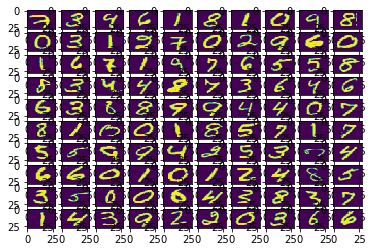

In [36]:
print("Shape of feature matrix:", mnist.train.images.shape) 
print("Shape of target matrix:", mnist.train.labels.shape) 
print("One-hot encoding for 1st observation:\n", mnist.train.labels[0]) 
  
# visualize data by plotting images 
fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto') 
        k += 1
plt.show() 

In [69]:
x_train = mnist.train.images[:55000,:]
print ('x_train Examples Loaded = ' + str(x_train.shape))
y_train = mnist.train.labels[:55000,:]
print ('y_train Examples Loaded = ' + str(y_train.shape))
    

    

x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)


In [0]:
import numpy as np
a = np.array(y_train)
y_train=[np.where(r==1)[0][0] for r in a]


In [79]:
from sklearn import linear_model
from sklearn import metrics

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000).fit(x_train,y_train)
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(x_train)))
  

Logistic regression Train Accuracy ::  0.9385818181818182


In [80]:
x_test=mnist.test.images[:3300,:]
y_test=mnist.train.labels[:3300,:]
b = np.array(y_test)
y_test=[np.where(r==1)[0][0] for r in b]
print("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(x_test)))

Logistic regression Test Accuracy ::  0.09878787878787879


The out of sample accuracy of neural network is around 89.5% while the out of sample accuracy using multinomial logistic regression is only 9.8% which is way less.

